This is a very simple example of using VGG16 in TensorFlow and Keras to classify a image.

Load TensorFlow, Keras, VGG16 and Python libraries.

In [1]:
# %tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


Set the model to VGG16 and print model summary.

In [2]:
model = VGG16()

553467904/553467096 [==============================] - 5s 0us/step


In [3]:
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Load an image from the net.

In [13]:
image=tf.keras.utils.get_file(origin='https://images.unsplash.com/photo-1532974297617-c0f05fe48bff?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=700&q=80',fname='car.jpg')
#image=tf.keras.utils.get_file(origin='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSbADF_KEXOz-W6x7pescoH0bOQ5Nh_bB6dug&usqp=CAU',fname='elephant.jpg')

73728/73000 [==============================] - 0s 0us/step


Resize image.

In [14]:
image = load_img(image, target_size=(224, 224))

Show image

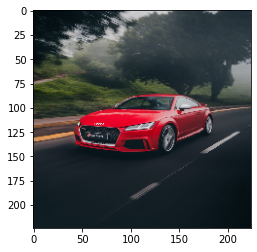

In [15]:
plt.imshow(image)

Convert image to Numpy array

In [16]:
image = tf.keras.preprocessing.image.img_to_array(image)

Reshape data for the model.

In [17]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

Preprocess data for the VGG model.

In [18]:
image = preprocess_input(image)

Predict the probability across all output classes.

In [19]:
p = model.predict(image)

Convert the probabilities to class labels.

In [20]:
label = decode_predictions(p)

Print the label.

In [21]:
print(label)

[[('n03100240', 'convertible', 0.4715466), ('n04037443', 'racer', 0.2193801), ('n04285008', 'sports_car', 0.2094268), ('n02974003', 'car_wheel', 0.03803506), ('n02814533', 'beach_wagon', 0.024176417)]]
